# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df = pd.read_csv('data/M1_final.csv')
df_0 = df.copy()

# Clean Dataset

## Drop NaN

In [4]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(28820, 23)
(28818, 23)


## Dtypes

In [5]:
df['Dew Point'] = df['Dew Point'].apply(lambda r : r.split()[0])
df['Dew Point'] = pd.to_numeric(df['Dew Point'])

## Numerical cols

In [6]:
df_num = df.loc[:, df.dtypes != np.object]
df_num.shape

(28818, 18)

## Categorical cols

In [7]:
df_cat = df.loc[:, df.dtypes == np.object]
df_cat.shape

(28818, 5)

# TAXI_OUT

In [8]:
X = df.drop('TAXI_OUT', axis=1)
X_num = df_num.drop('TAXI_OUT', axis=1)
y = df['TAXI_OUT']
z = df_num['TAXI_OUT']

## plot scatter

In [9]:
df_num.head(2)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15


In [10]:
phy_cols = ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']

In [11]:
time_cols = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY']

In [12]:
other_cols = ['DEP_DELAY', 'CRS_ELAPSED_TIME', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'sch_dep', 'sch_arr']

In [13]:
def plot_scatter(df, cols, z):
    n = 1
    n_length = len(cols)
    plt.figure(figsize=(30,30))
    for i,x_lbl in enumerate(cols):
        for j,y_lbl in enumerate(cols):
            x = df[x_lbl]
            y = df[y_lbl]
            plt.subplot(n_length,n_length,n)

            plt.scatter(x,y, c=z)
            plt.xlabel(x_lbl)
            plt.ylabel(y_lbl)
            n+=1

In [14]:
#plot_scatter(df_num, phy_cols, z)

In [15]:
#plot_scatter(df_num, time_cols, z)

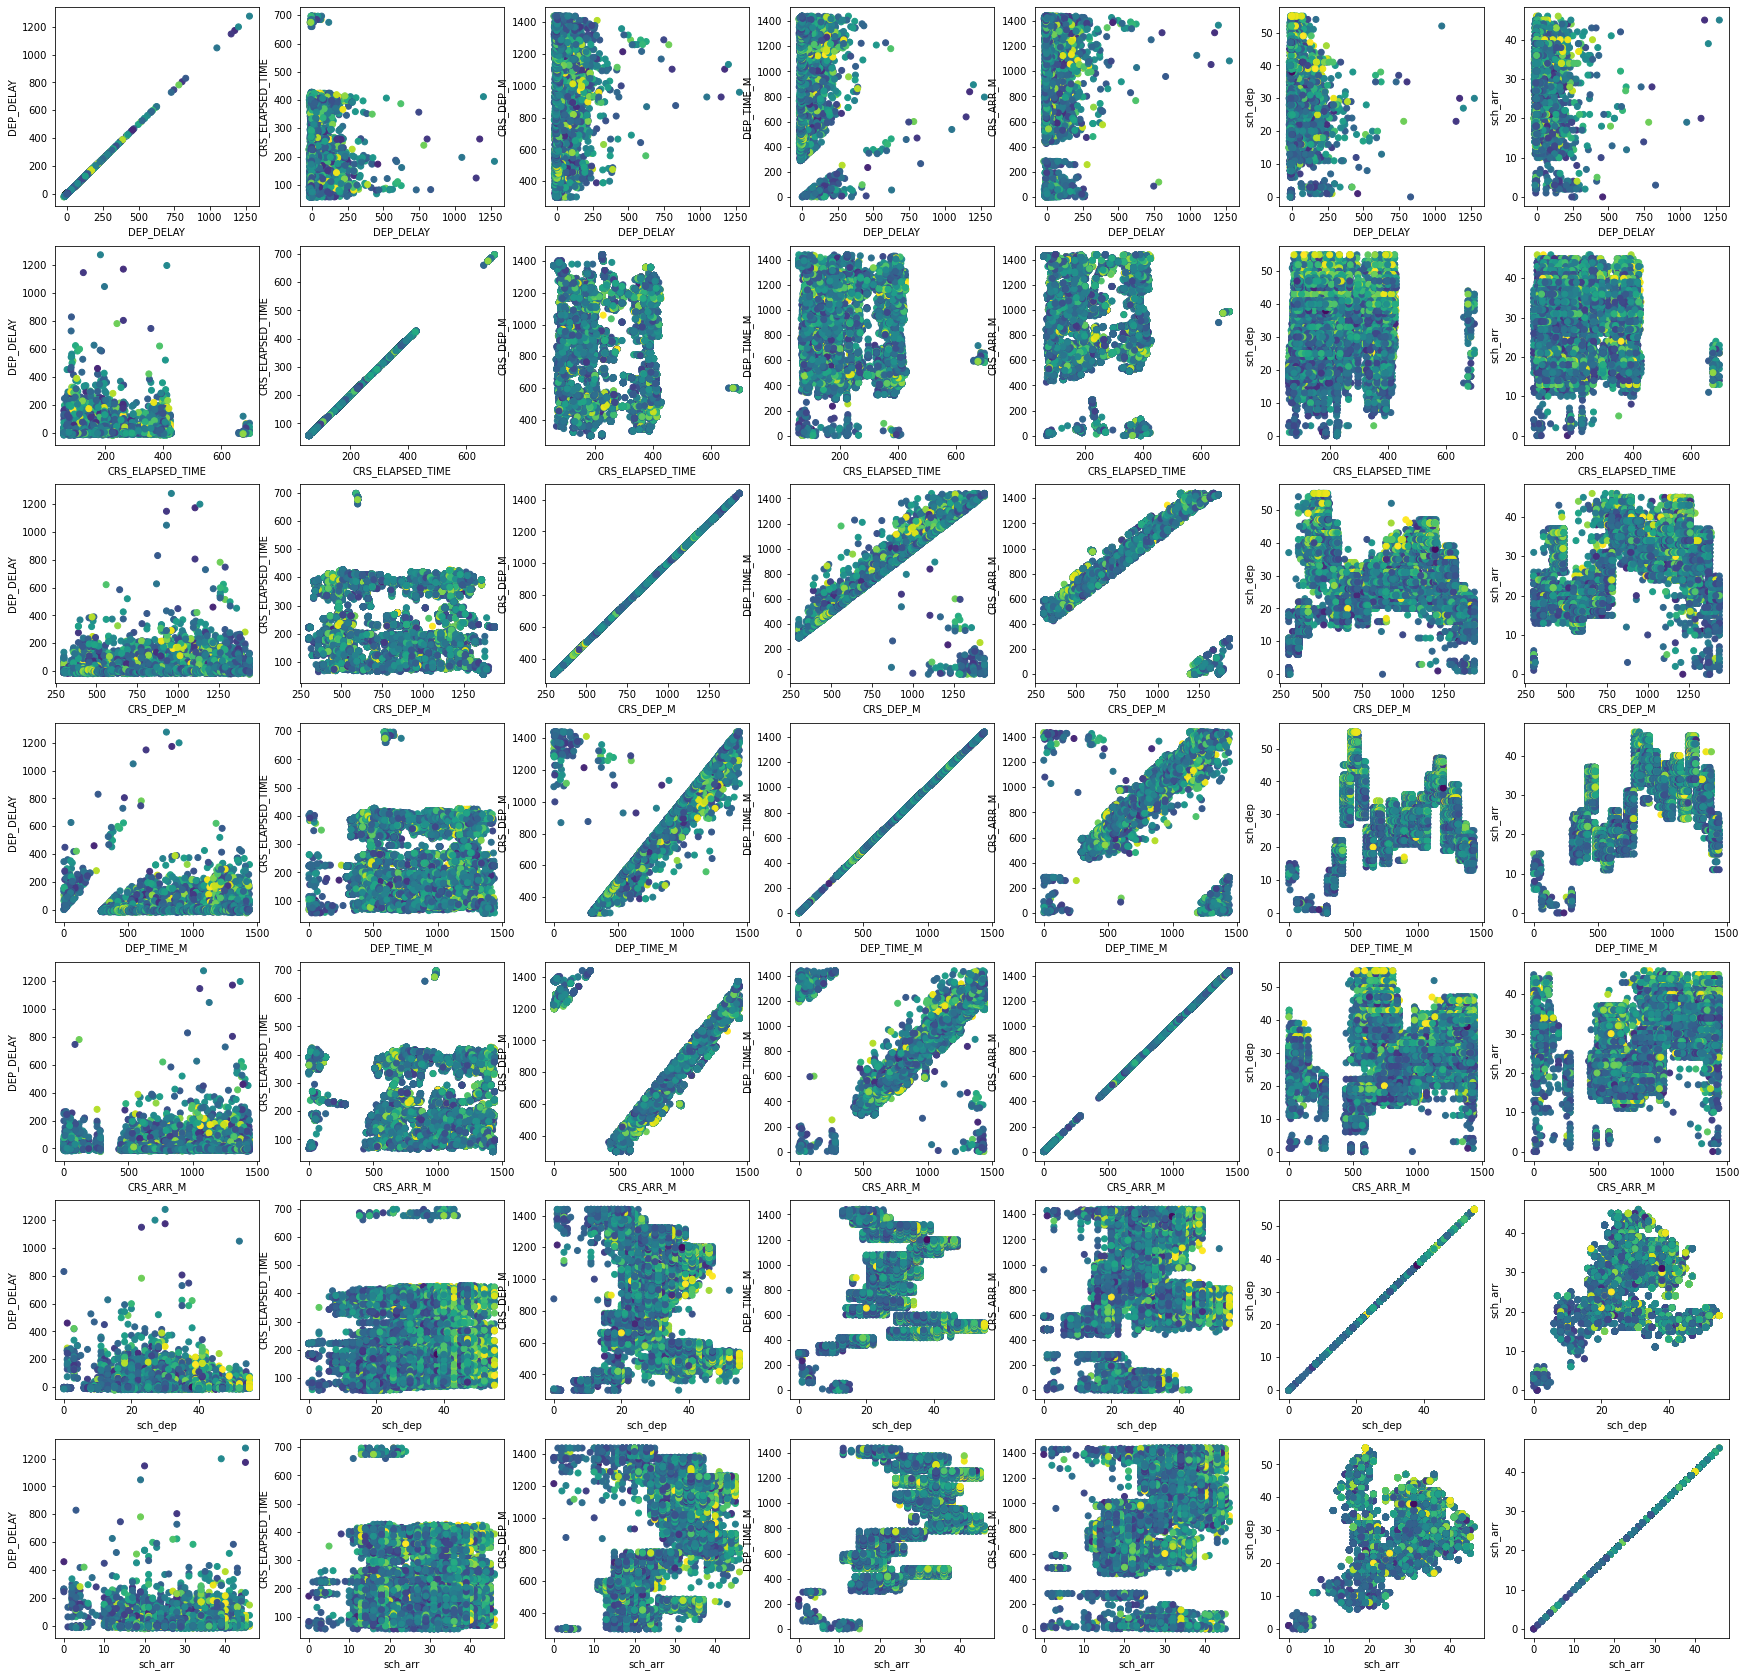

In [54]:
plot_scatter(df_num, other_cols, z)

## New Features 

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def model_run_cv(cols, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X_train[cols])
    y_scale = scaler.fit_transform(np.array(y_train).reshape(-1,1))
    
    estimator = DecisionTreeRegressor()    
    scr = cross_val_score(estimator, X_scale, y_scale, cv=5).mean()
    print('score = {:.0%}'.format(scr))
    
    y_pred = cross_val_predict(estimator, X_scale, y_scale, cv=5)
    plt.scatter(y_scale, y_pred)
    plt.show();

In [18]:
X_num.head(3)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17


In [19]:
# handle infinite situation

In [55]:
X_num['dew_temp'] = X_num['Dew Point'] / X_num['Temperature']
X_num['wind_wind'] = X_num['Wind Speed'] / (X_num['Wind Gust']+1)
X_num['r1'] = X_num['DEP_TIME_M'] / (X_num['CRS_DEP_M'] + 1)
X_num['r2'] = X_num['CRS_ARR_M'] / (X_num['CRS_DEP_M'] + 1)
X_num['r3'] = X_num['CRS_ARR_M'] / (X_num['DEP_TIME_M'] + 1)
X['r4'] = X['sch_arr'] / (X['sch_dep'] + 1)
X_num['r5'] = X_num['DEP_DELAY'] / (X_num['sch_arr'] + 1)
X_num['r6'] = X_num['CRS_ELAPSED_TIME'] / (X_num['sch_dep'] + 1)

score = 20%


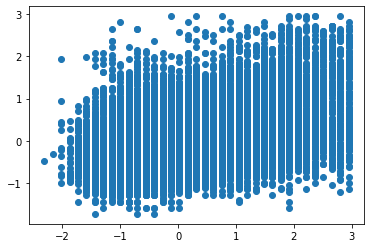

In [44]:
cols = ['r4', 'Humidity', 'DAY_OF_MONTH', 'dew_temp']
model_run_cv(cols, X_num, y)

score = 20%


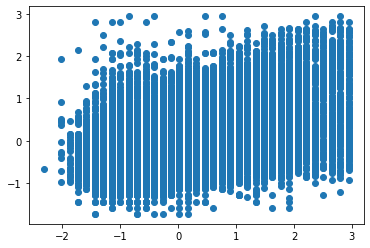

In [62]:
cols = ['r4', 'Humidity', 'DAY_OF_MONTH', 'wind_wind']
model_run_cv(cols, X_num, y)

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

def crossVal_model(numerical_features, categorical_features, estimator, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    #preprocessing
    numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
    categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))

    preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                           (categorical_pipeline, categorical_features))
    
    #model
    model = make_pipeline(preprocessor, estimator)
    
    #cross validation
    scr = cross_val_score(model, X_train, y_train, cv=5).mean()
    print('score = {:.0%}'.format(scr))
    
    #plot
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    plt.scatter(y_train, y_pred)
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.show();

In [68]:
X.head(2)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17


In [71]:
X['r4'] = X['sch_arr'] / (X['sch_dep'] + 1)

score = 19%


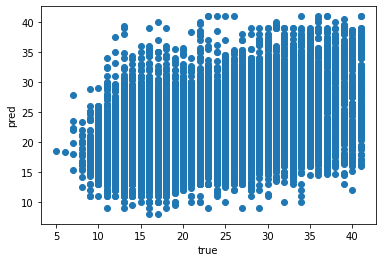

In [81]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor()

num_cols = ['r4', 'DAY_OF_MONTH', 'Temperature', 'Humidity']
cat_cols = ['Condition', 'Wind']
crossVal_model(num_cols, cat_cols, estimator, X, y)

In [91]:
X['Wind'] = X['Wind'].apply(lambda r: r[0])

score = 20%


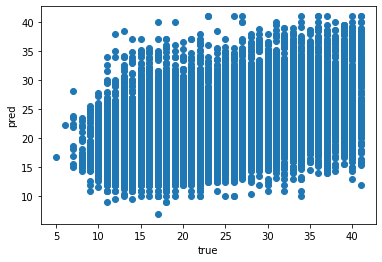

In [92]:
num_cols = ['r4', 'DAY_OF_MONTH', 'Temperature', 'Humidity']
cat_cols = ['Condition', 'Wind']
crossVal_model(num_cols, cat_cols, estimator, X, y)

In [97]:
X['Condition'] = X['Condition'].apply(lambda r: r.split()[0])

score = 19%


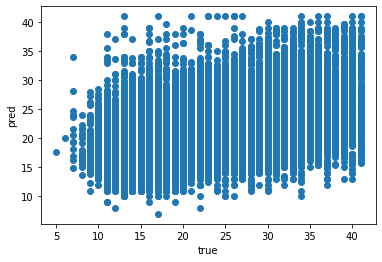

In [98]:
num_cols = ['r4', 'DAY_OF_MONTH', 'Temperature', 'Humidity']
cat_cols = ['Condition', 'Wind']
crossVal_model(num_cols, cat_cols, estimator, X, y)

score = 2%


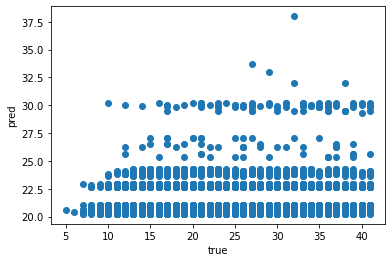

In [100]:
num_cols = []
cat_cols = ['Condition']
crossVal_model(num_cols, cat_cols, estimator, X, y)

# Data exploration TAXI out vs CONDITION

In [102]:
x = df['TAXI_OUT']
y = df['Condition']

In [105]:
conditions = list(y.unique())

In [112]:
s = df['TAXI_OUT'].groupby(df['Condition']).mean()
s = s.sort_values(ascending=False)
s

Condition
Wintry Mix / Windy       39.000000
Snow                     35.000000
Drizzle and Fog          32.600000
Light Snow               30.131579
Light Freezing Rain      30.000000
Wintry Mix               29.265060
Light Drizzle / Windy    29.111111
Heavy Rain               27.037037
Light Snow / Windy       26.958333
Fog                      24.965986
Light Rain / Windy       24.666667
Rain / Windy             24.400000
Rain                     24.014245
Partly Cloudy / Windy    22.781787
Light Rain               22.221448
Light Drizzle            21.659794
Mostly Cloudy / Windy    21.651872
Fair / Windy             21.265795
Cloudy / Windy           20.970674
Partly Cloudy            20.628856
Mostly Cloudy            20.469086
Cloudy                   20.258814
Fair                     20.240969
Fog / Windy              16.928571
Heavy Rain / Windy       15.833333
Name: TAXI_OUT, dtype: float64

In [133]:
def simplify_condition(r):
    if 'Wintry' in r:
        r = 'snow'
    if 'Snow' in r:
        r = 'snow'
    if 'Cloudy' in r:
        r = 'cloudy'
    if 'Rain' in r:
        r = 'rain'
    if 'Fog' in r:
        r = 'fog'
    if 'Drizzle' in r:
        r='fog'
    if 'Fair' in r:
        r='fair'
    return r
    
df['Cond'] = df['Condition'].apply(lambda r : simplify_condition(r))

In [142]:
X.head(3)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,Cond
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,fair
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,fair
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,fair


score = 23%


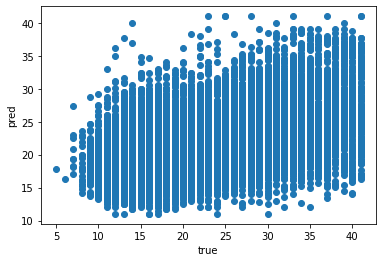

In [147]:
X = df.drop('TAXI_OUT', axis=1)
y = df['TAXI_OUT']
num_cols = ['Wind Gust', 'Pressure', 'Temperature', 'Wind Speed', 'DAY_OF_MONTH', 'Dew Point', 'DAY_OF_WEEK']
cat_cols = ['Cond', 'Wind']
crossVal_model(num_cols, cat_cols, estimator, X, y)

score = 23%


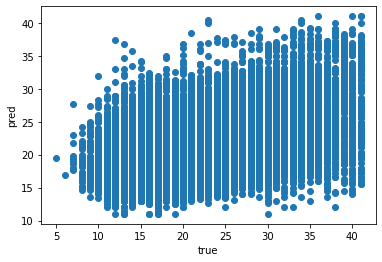

In [159]:
X = df.drop('TAXI_OUT', axis=1)
y = df['TAXI_OUT']
num_cols = ['Wind Gust', 'Pressure', 'Temperature', 'Wind Speed', 'DAY_OF_MONTH', 'Dew Point', 'DAY_OF_WEEK']
cat_cols = []
crossVal_model(num_cols, cat_cols, estimator, X, y)

# TEST

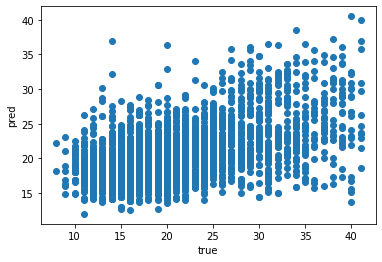

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#preprocessing
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))

preprocessor = make_column_transformer((numerical_pipeline, num_cols), 
                                       (categorical_pipeline, cat_cols))

#model
model = make_pipeline(preprocessor, estimator)

#cross validation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.show();


In [158]:
y_test[30:35]

12160    37
10997    12
26439    20
7848     20
15014    40
Name: TAXI_OUT, dtype: int64

In [157]:
y_pred[30:35]

array([25.16666667, 20.20833333, 22.07142857, 25.57894737, 26.07692308])